### Introduction
In this notebook, we evaluate the performance of the trained Convolutional Neural Network (CNN) on the CIFAR-10 dataset. The goal is to analyze how well the model generalizes to unseen data and identify potential areas for improvement.




### Importing Libraries and Loading the Model

In [6]:

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import json

notebook_dir = os.path.abspath('')  
src_path = os.path.join(notebook_dir, "..", "src") 
sys.path.append(src_path)  

from data_loader import load_data




### Loading Test Data and Trained Model

In [2]:
_, _, _, _, X_test, y_test = load_data()

notebook_dir = os.path.abspath('')  
model_path = os.path.join(notebook_dir, "..", "models", "best_model.keras")

model = tf.keras.models.load_model(model_path)

print("Model loaded successfully!")


Data loaded successfully!
Training shape: (40000, 32, 32, 3), Labels: (40000, 10)
Validation shape: (10000, 32, 32, 3), Labels: (10000, 10)
Test shape: (10000, 32, 32, 3), Labels: (10000, 10)
Model loaded successfully!


### Generating Model Predictions

In [3]:
y_pred_probs = model.predict(X_test)  
y_pred = np.argmax(y_pred_probs, axis=1)  
y_true = np.argmax(y_test, axis=1)  


313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 99ms/step


### Evaluating Model Performance

In [4]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)


print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 109ms/step - accuracy: 0.8975 - loss: 0.5556
Test Accuracy: 0.8990
Test Loss: 0.5551


### Confusion Matrix

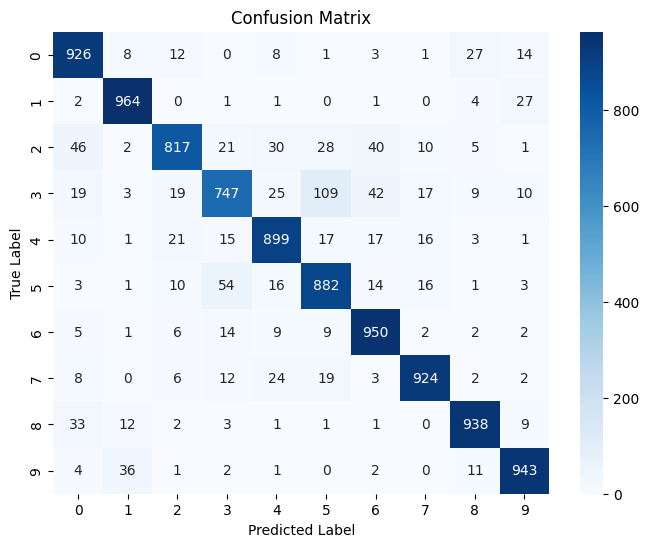

In [14]:
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### Classification Report

In [15]:
report = classification_report(y_true, y_pred, target_names=[
    "airplane", "automobile", "bird", "cat", "deer", 
    "dog", "frog", "horse", "ship", "truck"
])

print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

    airplane       0.88      0.93      0.90      1000
  automobile       0.94      0.96      0.95      1000
        bird       0.91      0.82      0.86      1000
         cat       0.86      0.75      0.80      1000
        deer       0.89      0.90      0.89      1000
         dog       0.83      0.88      0.85      1000
        frog       0.89      0.95      0.92      1000
       horse       0.94      0.92      0.93      1000
        ship       0.94      0.94      0.94      1000
       truck       0.93      0.94      0.94      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### Misclassified Samples

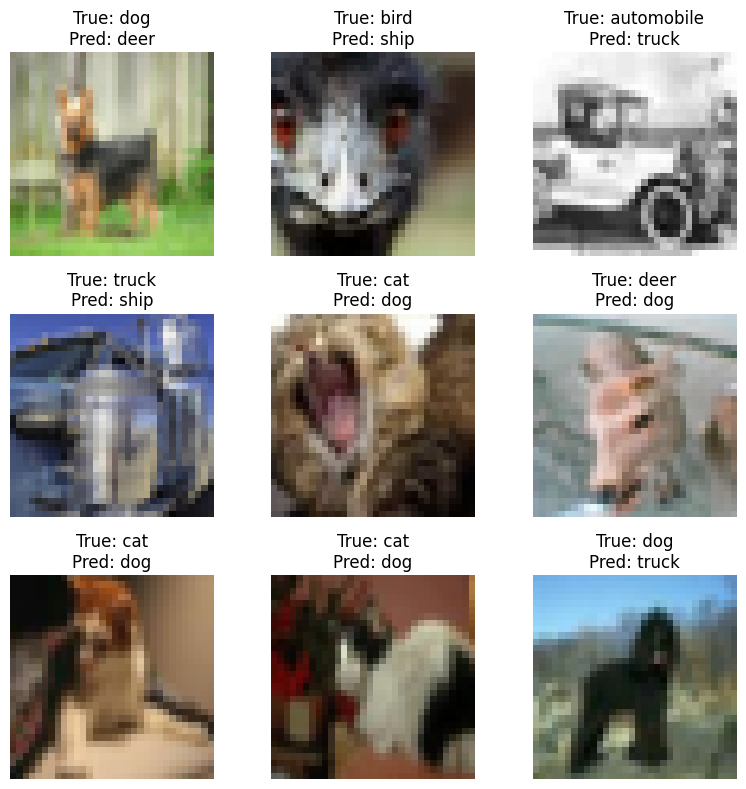

In [16]:

class_names = ["airplane", "automobile", "bird", "cat", "deer", 
               "dog", "frog", "horse", "ship", "truck"]

misclassified_indices = np.where(y_true != y_pred)[0]

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

for i in range(9):
    index = misclassified_indices[i]
    true_label = class_names[y_true[index]] 
    pred_label = class_names[y_pred[index]]  
    
    axes[i].imshow(X_test[index])
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()



### Saving Results to JSON File

In [17]:
notebook_dir = os.path.abspath('')  
results_path = os.path.join(notebook_dir, "..", "results", "test_results.json")

with open(results_path, "w") as f:
    json.dump(report, f, indent=4) 

print("Results saved")


Results saved


### Conclusion

The trained CNN achieved an **accuracy of 90%** on the CIFAR-10 test set, demonstrating strong classification performance. 

#### Key Observations:
- Most classes performed well , with **automobile (0.95), truck (0.94) and ship (0.94)** achieving the highest scores.
- **Misclassifications occurred mainly between visually similar objects**, such as **automobiles vs. trucks** and **dogs vs. cats**.
- **The most challenging class was "cat"** (F1-score of **0.80**), likely due to similarities with dogs.


#### Potential Improvements:
- **Data Augmentation** (rotation, flipping, contrast adjustments) to improve generalization.
- **Hyperparameter Tuning** (learning rate scheduling, regularization) to enhance robustness.
- **Transfer Learning** with pre-trained models (e.g., ResNet, VGG) for improved feature extraction.

This project successfully demonstrates deep learning techniques for image classification. Future refinements could further optimize performance in challenging categories.
